# 강의 데이터 분석

In [1]:
# 필요한 패키지 불러오기
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

## 데이터 설명
- 데이터의 경우 order, course, customer, refund, user 총 5개로 이루어져 있습니다.
- 데이터의 형태와 크기는 아래와 같습니다. 데이터의 형태의 경우 위에서 부터 5개의 열을 보여주고 있습니다.

In [2]:
order_df = pd.read_csv('/Users/raphaelseo/Documents/study/fastcampus/바이트디그리/최종/order-9968.txt')
print('데이터의 크기는 다음과 같습니다.', order_df.shape)
order_df.to_csv('order.csv', index=False, encoding='utf-8')
order_df.head()

데이터의 크기는 다음과 같습니다. (284035, 11)


,id,type,state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000
3,1600577,ORDER,COMPLETED,백엔드 개발자를 위,2022-12-31 23:35:52,2022-12-31 23:36:09,1083664,20000,20000,10000,20000
4,1600574,ORDER,COMPLETED,React Nati,2022-12-31 23:30:51,2022-12-31 23:31:13,1033553,20000,20000,0,20000


In [3]:
course_df = pd.read_csv('/Users/raphaelseo/Documents/study/fastcampus/바이트디그리/최종/course-9968.csv')
print('데이터의 크기는 다음과 같습니다.', course_df.shape)
course_df.head()

데이터의 크기는 다음과 같습니다. (722, 10)


,id,type,state,created_at,updated_at,title,description,close_at,total_class_hours,keywords
0,214903,COURSE,ONGOING,2022-12-27 1:33,2022-12-27 1:33,(B2G) K-Di-214903,NaN,NaN,NaN,NaN
1,214898,COURSE,ONGOING,2022-12-26 12:25,2022-12-26 12:25,(B2G) K-Di-214898,NaN,NaN,NaN,NaN
2,214897,COURSE,ONGOING,2022-12-26 12:20,2022-12-26 12:20,(B2G) K-Di-214897,NaN,NaN,NaN,NaN
3,214896,COURSE,ONGOING,2022-12-26 12:17,2022-12-26 12:17,(B2G) K-Di-214896,NaN,NaN,NaN,NaN
4,214895,COURSE,ONGOING,2022-12-26 12:14,2022-12-26 12:14,(B2G) K-Di-214895,NaN,NaN,NaN,NaN


In [4]:
customer_df = pd.read_excel('/Users/raphaelseo/Documents/study/fastcampus/바이트디그리/최종/customer-9968.xlsx', engine='openpyxl')
print('데이터의 크기는 다음과 같습니다.', customer_df.shape)
customer_df.head()

데이터의 크기는 다음과 같습니다. (123013, 9)


,id,type,state,created_at,updated_at,user_id,name,phone,email
0,1482394,USER,NORMAL,2024-01-24 04:44:52,2024-01-24 13:54:05,959919,USER_1482394,1012345678,USER_1482394@notexistemail.com
1,1482300,USER,NORMAL,2024-01-24 04:43:18,2024-01-25 06:10:38,818301,USER_1482300,1012345678,USER_1482300@notexistemail.com
2,1482071,USER,NORMAL,2024-01-24 04:41:50,2024-01-25 07:46:45,543671,USER_1482071,1012345678,USER_1482071@notexistemail.com
3,1445268,USER,NORMAL,2023-12-27 04:17:51,2023-12-27 04:17:51,824733,USER_1445268,1012345678,USER_1445268@notexistemail.com
4,1445150,USER,NORMAL,2023-12-27 04:15:45,2023-12-27 04:15:45,767404,USER_1445150,1012345678,USER_1445150@notexistemail.com


In [5]:
refund_df = pd.read_csv('/Users/raphaelseo/Documents/study/fastcampus/바이트디그리/최종/refund-9968.csv')
print('데이터의 크기는 다음과 같습니다.', refund_df.shape)
refund_df.head()

데이터의 크기는 다음과 같습니다. (12674, 9)


,id,type,state,created_at,updated_at,user_id,course_id,amount,tax_free_amount
0,72124,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:29,2022-12-30 7:29,619833.0,214323.0,-20000,-20000
1,72121,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:01,2022-12-30 7:01,146614.0,213905.0,-10000,-10000
2,72119,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:08,2022-12-30 6:08,541404.0,214402.0,0,0
3,72117,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:00,2022-12-30 6:00,1056095.0,203935.0,-10000,-10000
4,72116,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 5:57,2022-12-30 5:57,98880.0,213244.0,-20000,-20000


In [6]:
user_df = pd.read_csv('/Users/raphaelseo/Documents/study/fastcampus/바이트디그리/최종/user-9968.csv')
print('데이터의 크기는 다음과 같습니다.', user_df.shape)
user_df.head()

데이터의 크기는 다음과 같습니다. (122989, 7)


,id,type,state,created_at,updated_at,last_login_at,username
0,1075089,USER,NORMAL,2022-12-31 23:39:19,2023-12-02 00:00:22,2022-12-31 23:44:35,dkfk
1,1075079,USER,NORMAL,2022-12-31 23:08:47,2023-12-03 23:34:39,2023-12-03 23:34:40,toqu
2,1075074,USER,NORMAL,2022-12-31 22:46:31,2023-10-19 11:49:10,2023-10-19 11:49:10,theh
3,1075064,USER,NORMAL,2022-12-31 22:03:14,2023-10-06 18:20:51,2023-10-06 18:20:51,tige
4,1075059,USER,NORMAL,2022-12-31 21:35:42,2023-02-17 01:54:52,2023-02-17 01:54:52,kyg6


## EDA (Exploratory Data Analysis, 탐색적 데이터 분석) 진행
- 각각의 데이터들을 활용하여 다음과 같은 질문들에 답을 하고자 합니다.
    - Q2-1 2022년 1월 중 가장 매출이 높았던 3일과 낮았던 3일은 언제인가요? (status = COMPLETED 기준)
    - Q2-2 그리고 그 때의 매출액(list_price)과, 주문 수, 신청자 수, 강의 수는 각각 얼마인가요?
    - Q2-3 월별 각 강의 별 할인율은 어떻게 될까요?
    - Q2-4 강의 키워드에서 가장 많이 언급된 단어는 무엇인가요?
    - Q2-5 환불이 가장 많은 강의는 어떤 강의였나요?
    - Q2-6 강의를 가장 많이 신청한 고객과 그 금액은 얼마인가요?
    - Q2-7 주말과 주중의 평균 강의 신청율은 어떻게 다를까요?
    - Q2-8 주로 몇시에 회원 가입(created_at)이 활발했나요? 월별로 차이가 있는지 보여주고, 그 근거를 추론해 보세요
    - Q2-9 강의 가격(list_price)을 5만원 단위의 도수분포표로 나타내 주세요.
    - Q2-10 신청이 완료된 강의(complated)와 진행중인 강의(pending), 그리고 취소된 강의(cancelled) 간의 금액(list_price)과 유저의 비중을 월별로 각각 구하시오?
    - Q2-11 state이 HIBERNATED 된 Used들은 ID를 생성(created_at)하고 마지막 로그인(last_login_at)까지 평균적으로 몇일이 걸렸나요?

### Q2-1
- 2022년 1월 중 가장 매출이 높았던 3일과 낮았던 3일은 언제인가요? (status = COMPLETED 기준)

In [7]:
# 주문 데이터중 상태가 Complete인 것들만 추출 및 날짜데이터 변환
target = order_df[order_df['state']=='COMPLETED']
target['created_at'] = pd.to_datetime(target['created_at']).dt.normalize()

In [8]:
# 매출 기준을 세전 가격인 tax_free_price를 기준으로 정하여 월별 합산을 계산
t = target.groupby('created_at')['tax_free_price'].sum().reset_index()

In [9]:
# 타겟 데이터 중 1월 데이터만 추출
filtered_data = t[t['created_at'].dt.month == 1]

In [10]:
# 데이터를 매출 기준 내림차순으로 정렬
sort_data = filtered_data.sort_values('tax_free_price', ascending=False)

In [11]:
# 상위 3개
sort_data.head(3)

,created_at,tax_free_price
8,2022-01-09,30130000
4,2022-01-05,24880000
30,2022-01-31,22770000


In [12]:
# 하위 3개
sort_data.tail(3)

,created_at,tax_free_price
1,2022-01-02,7110000
21,2022-01-22,6180000
0,2022-01-01,5680000


#### 1월중 매출이 가장 높았던 날과 낮았던 날
- 매출의 기준은 소비자의 세전 가격인 tax_free_price를 기준으로 하였습니다.
- 1월 중 매출이 가장 높았던 3일은 9일, 5일 ,31일 순으로 높은 매출을 기록하였습니다.
- 반면 매출이 가장 낮았던 3일은 1일, 22일, 2일 순으로 낮은 매출을 기록하였습니다.

### Q2-2
- 그리고 그 때의 매출액(list_price)과, 주문 수, 신청자 수, 강의 수는 각각 얼마인가요?

In [13]:
# 각각 상위 3일과 하위 3일의 날짜데이터 추출
high_date = sort_data['created_at'][:3]
low_date = sort_data['created_at'][-3:]

In [14]:
# 주문 데이터를 날짜별로 그룹화 하고 각각 유니크한 유저수를 계산
user_count = target.groupby('created_at')['customer_id'].nunique().reset_index()

In [15]:
# customer_id 컬럼을 num of customer로 변경, 위에서 추출한 날짜들 데이터를 추출
user_count = user_count.rename(columns={'customer_id':'num of customer'})
user_count[(user_count['created_at'].isin(high_date)) | (user_count['created_at'].isin(low_date))]

,created_at,num of customer
0,2022-01-01,223
1,2022-01-02,383
4,2022-01-05,1149
8,2022-01-09,1058
21,2022-01-22,186
30,2022-01-31,728


In [16]:
# 주문 데이터를 날짜별로 그룹화하고 각각 유니크한 강의의 수를 계산
order_count = target.groupby('created_at')['id'].nunique().reset_index()

In [17]:
# 컬럼병을 변경하고 위에서 추출한 날짜에 해당하는 데이터를 추출
order_count = order_count.rename(columns={'id':'num of order'})
order_count[(order_count['created_at'].isin(high_date)) | (order_count['created_at'].isin(low_date))]

,created_at,num of order
0,2022-01-01,238
1,2022-01-02,412
4,2022-01-05,1276
8,2022-01-09,1195
21,2022-01-22,217
30,2022-01-31,902


#### 각 일자별 신청자, 강의, 주문 수
- 매출이 가장 높았던 9, 5, 31일의 신청자, 강의, 주문 수 모두 낮은 날들에 비해 비교적 높은 수치를 보여주고있습니다. 

### Q2-3
- 월별 각 강의 별 할인율은 어떻게 될까요?
- 할인율의 경우 list price 와 discount price를 활용하여 측정하였습니다.

In [18]:
# 주문 데이터의 날짜 데이터를 활용하여 월로 변환하고 할인율 계산
target = order_df.copy()
target['created_at'] = pd.to_datetime(target['created_at']).dt.month
target['discount_rate'] = target['discount_price']/target['list_price']*100

In [19]:
# 데이터를 이름과 월을 기준으로 그룹화하고 각 그룹의 평균 할인율을 계산
target.groupby(['name', 'created_at'])['discount_rate'].mean().reset_index().sort_values('discount_rate', ascending=False)

,name,created_at,discount_rate
630,K-Digital,2,100.0
1872,뇌 성장과 정서사회,9,100.0
1599,구글 Materia,10,100.0
2861,애프터이펙트 플러그,12,100.0
1870,뇌 성장과 정서사회,4,100.0
...,...,...,...
1938,대기업 ALL 합격,8,0.0
1939,대기업 ALL 합격,9,0.0
1942,대기업 연봉 편집자,6,0.0
1943,대기업 연봉 편집자,7,0.0


### Q2-4 
- 강의 키워드에서 가장 많이 언급된 단어는 무엇인가요?

In [20]:
# 강의 데이터 중 키워드 데이터가 채워져 있는 데이터 추출
target = course_df[course_df['keywords'].notnull()]
print(target.shape)
target.head()

(540, 10)


,id,type,state,created_at,updated_at,title,description,close_at,total_class_hours,keywords
16,214834,COURSE,ONGOING,2022-12-20 5:50,2023-11-20 1:17,네오아카데미 : 오-214834,뛰어난 묘사와 구성,NaN,26.0,"오카즈,판타지,게임,일러스트,그림,드로잉,네오아카데미,캐릭터,디자인,네오,세계관"
17,214833,COURSE,ONGOING,2022-12-20 5:47,2023-11-20 1:17,네오아카데미 : 후-214833,특별한 색채감과 빛,NaN,17.0,"후와리,라이트노벨,캐주얼,일러스트,캐릭터,CG일러스트,라이트,노벨,네오아카데미,네오..."
19,214561,COURSE,HIDDEN,2022-12-13 0:19,2023-08-11 9:11,Solana&Rus-214561,앵콜 무료!! So,NaN,9.0,"Solana,솔라나,SOLANA,solana,Rust,RUST,rust,솔라나강의,..."
20,214558,COURSE,ONGOING,2022-12-12 7:13,2024-01-25 18:03,입문자를 위한 풀스-214558,나만의 프로젝트를,NaN,95.0,"입문,풀스택,웹개발,프로젝트,프론트엔드,Frontend,JS,자바스크립트,JavaS..."
31,214496,COURSE,ONGOING,2022-12-05 6:50,2023-12-14 1:49,한 번에 끝내는 자-214496,자연어 처리 기본기,NaN,66.0,"자연어처리,NLP,BERT,TRANSFORMER,HUGGINGFACE,자연어처리기초..."


In [21]:
# 키워드 데이터를 하나의 스트링으로 합침
res = ','.join(target['keywords'])

In [22]:
# 문자열을 ','를 기준으로 분리
ls = res.split(',')

In [23]:
# 카운터 함수를 활용하여 각 단어의 갯수를 계산
result = Counter(ls)

In [24]:
result

Counter({'평생소장': 91,
         '프로그래밍': 67,
         '데이터사이언스': 62,
         '마케팅': 47,
         '디자인': 42,
         '딥러닝': 41,
         '일러스트': 39,
         '포토샵': 39,
         '데이터': 37,
         '숏북': 37,
         '전자책': 37,
         '데이터분석': 36,
         '드로잉': 35,
         '부동산': 35,
         '머신러닝': 29,
         '영상': 29,
         '3D': 26,
         '백엔드': 25,
         '디지털마케팅': 25,
         '프론트엔드': 24,
         'SQL': 24,
         '애프터이펙트': 24,
         '프로젝트': 23,
         '파이썬': 23,
         '금융': 23,
         '더레드': 22,
         '구글애널리틱스': 22,
         '캐릭터': 21,
         '자바': 21,
         '초격차': 21,
         '그림': 20,
         'backend': 20,
         '태블로': 20,
         '광고': 20,
         '구글애즈': 19,
         '인공지능': 18,
         '일러스트레이터': 18,
         '웹개발': 17,
         '네카라쿠배': 17,
         '디자인툴': 17,
         '프리미어': 17,
         '인스타그램': 16,
         '취미': 16,
         '자바스크립트': 15,
         'UX': 15,
         'GA': 15,
         '실습': 15,
         '데브옵스': 15,
       

#### 강의 키워드에서 가장 많이 나온 단어
- 강의 키워드에서 가장 많이 나온 단어는 평생소장입니다.
- 그 다음으로 프로그래밍, 데이터사이언스, 마케팅 순으로 나타나고 있습니다.

### Q2-5 
- 환불이 가장 많은 강의는 어떤 강의였나요?

In [25]:
# 환불 데이터를 각 강의의 id를 기준으로 사이즈를 계산하고 갯수가 많은 순으로 내림차순 정렬
refund_df.groupby('course_id').size().sort_values(ascending=False)

course_id
211368.0    269
203525.0    224
203720.0    205
204373.0    187
212600.0    182
           ... 
211174.0      1
211171.0      1
203657.0      1
211094.0      1
214845.0      1
Length: 504, dtype: int64

In [26]:
# 가장 많이 나나온 데이터의 제목을 추출
course_df[course_df['id']==211368.0]['title']

283    10개 프로젝트로 -211368
Name: title, dtype: object

#### 결과
- 10개 프로젝트로 -211368 강의가 가장 환불이 많이 된 강의였습니다.

### Q2-6 
- 강의를 가장 많이 신청한 고객과 그 금액은 얼마인가요?

In [27]:
# 신청중에 완료된 것들을 추출
target = order_df[order_df['state']=='COMPLETED']

In [28]:
# 거래 데이터를 유저 id로 그룹화하고 사이즈를 계산하여 신청을 가장 많이한 순으로 내침차순 정렬
target.groupby('customer_id').size().sort_values(ascending=False)

customer_id
793517    307
777099    288
793514    229
276705    159
98685     143
         ... 
414551      1
847721      1
847725      1
414529      1
825214      1
Length: 94549, dtype: int64

In [29]:
# 거래을 가장 많이한 고객이 결제한 금액을 계산
target2 = target[target['customer_id']==793517]
target2['tax_free_price'].sum()

70000

In [30]:
# 유저 아이디를 활용하여 고객데이터에서 고객정보 추출
customer_df[customer_df['id']==793517]

,id,type,state,created_at,updated_at,user_id,name,phone,email
69711,793517,USER,NORMAL,2022-02-03 05:30:03,2023-10-24 07:05:20,783482,USER_793517,1012345678,USER_793517@notexistemail.com


In [31]:
# 데이터를 유저 아이디로 그룹화하여 결제 금액을 계산하고 많이 결제한 순으로 정렬
target.groupby('customer_id')['tax_free_price'].sum().sort_values(ascending=False)

customer_id
116416    25030000
98685      2270000
921091     2020000
6475       1650000
968732     1580000
            ...   
907780           0
651569           0
907663           0
564314           0
175654           0
Name: tax_free_price, Length: 94549, dtype: int64

In [32]:
# 가장 결제 금액이 높은 고객의 정보를 추출
customer_df[customer_df['id']==116416]

,id,type,state,created_at,updated_at,user_id,name,phone,email
111969,116416,USER,NORMAL,2020-06-03 23:43:41,2021-07-30 01:36:10,102258,USER_116416,1012345678,USER_116416@notexistemail.com


#### 가장 많이 강의를 많이 구매한 고객
- USER_793517 고객이 가장 많은 307번의 신청을 진행하였습니다.
- 총 환불 금액은 약 70,000원 이었습니다.
- 반면 가장 높은 결제금을 기록한 고객은 USER_116416 고객으로 약 25,030,000원 기록하였습니다.

### Q2-7
- 주말과 주중의 평균 강의 신청율은 어떻게 다를까요?

In [33]:
# 주문 데이터의 날짜를 활용하여 요일을 계산
target = order_df.copy()
target['created_at'] = pd.to_datetime(target['created_at']).dt.day_name()

In [34]:
# 여러 공휴일이 있지만 모두 적용하기에는 어려움이 있어 토요일과 일요일만 주말로 지정
weekend = target[(target['created_at']=='Saturday') | (target['created_at']=='Sunday')]

In [35]:
# 주말의 강의 신청 상태의 비율을 계산
weekend['state'].value_counts(normalize=True)

state
COMPLETED    0.597544
CANCELLED    0.215566
PENDING      0.186890
Name: proportion, dtype: float64

In [36]:
# 토요일과 일요일을 제외한 모든 요일을 평일로 지정
weekday = target[(target['created_at']!='Saturday') & (target['created_at']!='Sunday')]

In [37]:
# 평일의 강의 신청 상태의 비율을 계산
weekday['state'].value_counts(normalize=True)

state
COMPLETED    0.627683
CANCELLED    0.200961
PENDING      0.171356
Name: proportion, dtype: float64

#### 결과
- 전체 데이터에서 주말을 일요일과 토요일로 제한하고 데이터를 분리하여 분석하였습니다.
- 강의의 수강률은 전체 데이터에서 order의 status가 Completed인 데이터를 기준으로 측정하였습니다.
- 결과 평일의 수강률은 약 63% 이고 주말의 수강률은 약 60% 로 평일의 수강률이 약 3%p 높았습니다.

### Q2-8
- 주로 몇시에 회원 가입(created_at)이 활발했나요? 월별로 차이가 있는지 보여주고, 그 근거를 추론해 보세요

In [38]:
# 유저 데이터의 생성 시간을 활용하여 시간과 월을 계산
target = user_df.copy()
target['hour'] = pd.to_datetime(target['created_at']).dt.hour
target['month'] = pd.to_datetime(target['created_at']).dt.month

In [39]:
# 데이터를 월별로 그룹화하고 가장 많이 나온 시간을 계산
target.groupby('month')['hour'].agg(lambda x: x.mode())

month
1     13
2     13
3      5
4      7
5      7
6      6
7      7
8      7
9      7
10     5
11     7
12    13
Name: hour, dtype: int32

In [40]:
# 데이터를 월별로 그룹화하고 평균 시간을 계산
target.groupby('month')['hour'].mean()

month
1     9.133587
2     9.120638
3     8.702896
4     8.913628
5     8.575037
6     9.023313
7     8.827586
8     8.965751
9     8.952554
10    8.849011
11    8.617972
12    8.933304
Name: hour, dtype: float64

#### 결과
- 12, 1, 2월의 경우 13시의 회원가입이 가장 많았고, 다른 기간의 경우 5, 6, 7시의 회원가입이 많았습니다.
- 평균으로는 모든 월이 8-9시가 나와 큰 차이를 보여주지 않고 있습니다.
- 현재 보유중인 데이터로는 증명할 수 없지만 12, 1, 2월의 대부분의 학생이 방학을 하고 이로인해서 틀어진 생활패턴에 따라 시간이 달라진다고 추측하고 있습니다.

### Q2-9
- 강의 가격(list_price)을 5만원 단위의 도수분포표로 나타내 주세요.

In [41]:
# 주문 데이터에서 가격의 범위를 확인
order_df['list_price'].unique()

array([  10000,   40000,   20000,   30000,  100000,   60000,   50000,
         90000,  230000,   80000,  300000,  180000,  500000,  150000,
        600000,  200000,  480000,  140000,  110000,  120000, 1240000,
        440000,   70000,  210000,  350000, 2530000,  270000,  160000,
        450000,  390000,  130000,  840000,  250000,  590000, 2020000,
        550000, 5270000, 1140000,  360000,  420000,  730000,  340000,
        260000, 4830000,  240000, 1200000,  900000, 1260000,  190000,
        530000,  170000, 6690000])

In [42]:
# 가격 데이터를 50000 단위로 분리, 각 단위별로 그룹화하여 사이즈 계산
bins = range(0, order_df['list_price'].max() + 50000, 50000)
traget = order_df.copy()
traget['bin'] = pd.cut(traget['list_price'], bins=bins, right=False)
freq_table = traget.groupby('bin').size().reset_index(name='frequency')

In [43]:
# 갯수가 0이 아닌 데이터만을 추출
nonzero_table = freq_table[freq_table['frequency'] != 0]
nonzero_table

,bin,frequency
0,"[0, 50000)",267266
1,"[50000, 100000)",12565
2,"[100000, 150000)",3656
3,"[150000, 200000)",73
4,"[200000, 250000)",172
5,"[250000, 300000)",4
6,"[300000, 350000)",52
7,"[350000, 400000)",202
8,"[400000, 450000)",5
9,"[450000, 500000)",4


#### 결과
- 0 ~ 50,000원 사이의 강의가 가장 많은 비율을 차지하고 있습니다.

### Q2-10
- 신청이 완료된 강의(complated)와 진행중인 강의(pending), 그리고 취소된 강의(cancelled) 간의 금액(list_price)과 유저의 비중을 월별로 각각 구하시오?

In [44]:
# 주문 데이터를 주문의 상태별로 분류 및 월 데이터 생성
target = order_df.copy()
target['month'] = pd.to_datetime(target['created_at']).dt.month
comp = target[target['state']=='COMPLETED']
pend = target[target['state']=='PENDING']
canc = target[target['state']=='CANCELLED']

In [45]:
# 완료된 주문을 월별로 그룹화하여 총 가격을 계산
comp.groupby('month')['list_price'].sum()

month
1     515660000
2     396660000
3     341250000
4     326280000
5     294430000
6     336600000
7     414130000
8     370250000
9     357260000
10    370320000
11    413810000
12    691980000
Name: list_price, dtype: int64

In [46]:
# 진행중인 주문을 월별로 그룹화하여 총 가격을 계산
pend.groupby('month')['list_price'].sum()

month
1     157970000
2     101860000
3      95090000
4     106080000
5      84820000
6     102510000
7     124670000
8     149980000
9     115070000
10    100100000
11    105790000
12    176760000
Name: list_price, dtype: int64

In [47]:
# 취소된 주문을 월별로 그룹화하여 총 가격을 계산
canc.groupby('month')['list_price'].sum()

month
1     218380000
2     140410000
3     138870000
4     132670000
5     105310000
6     126730000
7     166920000
8     142310000
9     149670000
10    131900000
11    146690000
12    180920000
Name: list_price, dtype: int64

In [48]:
# 주문 데이터를 월별로 그룹화하여 각 상태의 비율을 계산
target.groupby(['month'])['state'].value_counts(normalize=True).reset_index()

,month,state,proportion
0,1,COMPLETED,0.598796
1,1,CANCELLED,0.227209
2,1,PENDING,0.173995
3,2,COMPLETED,0.624552
4,2,CANCELLED,0.212950
5,2,PENDING,0.162498
6,3,COMPLETED,0.601921
7,3,CANCELLED,0.229853
8,3,PENDING,0.168226
9,4,COMPLETED,0.602142


### Q2-11
- state이 HIBERNATED 된 Used들은 ID를 생성(created_at)하고 마지막 로그인(last_login_at)까지 평균적으로 몇일이 걸렸나요?

In [49]:
# 유저 데이터 중 상태가 HIBERNATED인 데이터를 추출
target = user_df[user_df['state']=='HIBERNATED']
target.head()

,id,type,state,created_at,updated_at,last_login_at,username
4112,1060441,USER,HIBERNATED,2022-12-22 02:47:50,2023-12-22 03:00:26,2022-12-22 02:47:51,fire
4115,1060433,USER,HIBERNATED,2022-12-22 02:35:53,2023-12-22 03:00:26,2022-12-22 02:35:53,dlsd
4121,1060422,USER,HIBERNATED,2022-12-22 02:30:07,2023-12-22 03:00:26,2022-12-22 02:30:22,ever
4123,1060418,USER,HIBERNATED,2022-12-22 02:28:07,2023-12-22 03:00:26,2022-12-22 02:35:29,yong
4124,1060415,USER,HIBERNATED,2022-12-22 02:23:09,2023-12-22 03:00:26,2022-12-22 02:28:48,ssm7


In [50]:
# 데이터의 생성 시간과 마지막 로그인 시간의 날짜를 시간을 제외하고 변환
target['created_at'] = pd.to_datetime(target['created_at']).dt.normalize()
target['last_login_at'] = pd.to_datetime(target['last_login_at']).dt.normalize()

In [51]:
# 데이터별 생성 날짜와 마지막 로그인 날짜의 차이를 계산
target['diff'] = target['last_login_at'] - target['created_at']

In [52]:
# 차이의 평균을 계산
target['diff'].mean()

Timedelta('154 days 11:45:04.321257092')

#### 결과
- 아이디를 생성하고 마지막 로그인까지 평균적으로 약 154일이 걸렸습니다.

## Trend Analysis

In [53]:
# 각 데이터의 날짜 데이터에서 월 데이터 추출
order_df['month'] = pd.to_datetime(order_df['created_at']).dt.month
course_df['month'] = pd.to_datetime(course_df['created_at']).dt.month
user_df['month'] = pd.to_datetime(user_df['updated_at']).dt.month
customer_df['month'] = pd.to_datetime(customer_df['created_at']).dt.month
refund_df['month'] = pd.to_datetime(refund_df['created_at']).dt.month

### Order data trend
- order data의 tax free price를 활용하여 월별 매출 트렌드를 시각화 하였습니다.

In [54]:
# 주문 데이터의 날짜에서 연도를 추출하여 이를 바탕으로 2022년도 데이터만 분리
order_df['year'] = pd.to_datetime(order_df['created_at']).dt.year
target = order_df[order_df['year']==2022]
order_trend = target.groupby('month')['tax_free_price'].sum().reset_index()

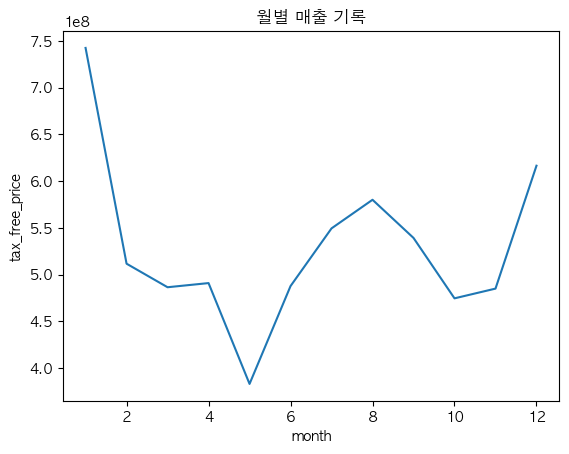

In [55]:
# 라인 그래프로 시각화
sns.lineplot(data=order_trend, x='month', y='tax_free_price')
plt.title('월별 매출 기록')
plt.show()

### Course data trend 분석
- 강의 데이터의 created_at 데이터를 활용하여 월별 강의의 생성 수를 분석

In [56]:
# 강의 데이터의 날짜에서 연도를 추출하여 이를 바탕으로 2022년도 데이터만 분리
course_df['year'] = pd.to_datetime(course_df['created_at']).dt.year
target = course_df[course_df['year']==2022]
target = target.groupby(['month']).size().reset_index()

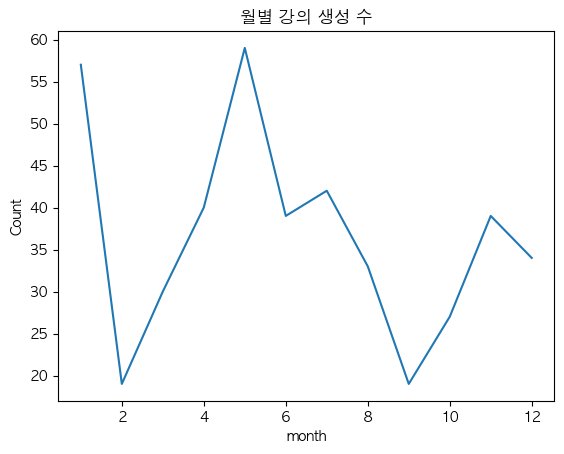

In [57]:
# 라인 그래프로 시각화
sns.lineplot(data=target, x='month', y=0)
plt.title('월별 강의 생성 수')
plt.ylabel('Count')
plt.show()

### User data trend 분석
- 유저 데이터의 업데이트 시간과 유저의 상태를 확인하여 삭제된 인원수 비교
- 삭제된 유저의 마지막 업데이트 시간을 삭제 시간으로 추정

In [58]:
# 유저 데이터의 날짜에서 연도를 분리하고 삭제한 유저를 추출, 추출된 데이터를 월별로 그룹화하여 사이즈를 계산
user_df['year'] = pd.to_datetime(user_df['updated_at']).dt.year
target = user_df[(user_df['year']==2022) & (user_df['state']=='DELETED')]
target2 = target.groupby('month').size().reset_index()

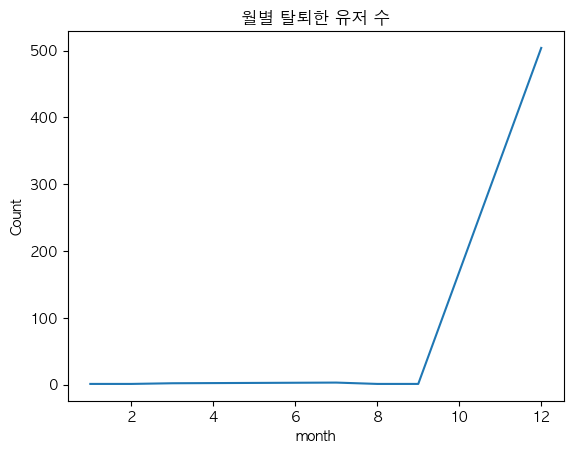

In [59]:
# 라인 그래프로 시각화 진행
sns.lineplot(data=target2, x='month', y=0)
plt.title('월별 탈퇴한 유저 수')
plt.ylabel('Count')
plt.show()

### Customer data trend 분석
- 소비자 데이터의 생성 시간을 활용하여 월별 회원가입한 인원수를 비교

In [60]:
# 소비자 데이터의 날짜에서 연도를 분리하고 2022년 데이터로 한정, 월별로 그룹화하여 사이즈 계산
customer_df['year'] = pd.to_datetime(customer_df['created_at']).dt.year
target = customer_df[customer_df['year']==2022]
target2 = target.groupby('month').size().reset_index()

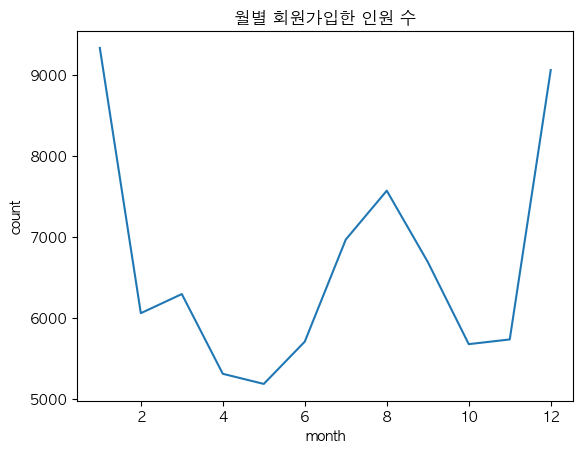

In [61]:
# 라인 그래프로 시각화
sns.lineplot(data=target2, x='month', y=0)
plt.ylabel('count')
plt.title('월별 회원가입한 인원 수')
plt.show()

### Refund data trend 분석
- 환불 데이터를 활용하여 월별 환불금액을 비교

In [66]:
# 환불 데이터의 날짜에서 연도를 분리하고 2022년 데이터로 한정, 월별로 그룹화하여 환불금액 계산
refund_df['year'] = pd.to_datetime(refund_df['created_at']).dt.year
target = refund_df[refund_df['year']==2022]
target2 = target.groupby('month')['tax_free_amount'].sum().reset_index()
target2['tax_free_amount'] = target2['tax_free_amount'] * -1

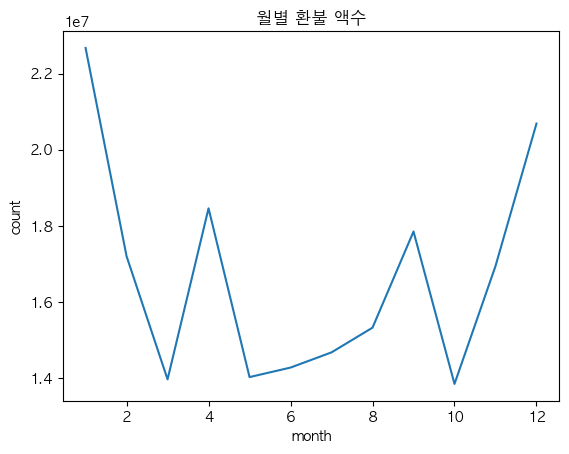

In [67]:
# 라인 그래프로 시각화
sns.lineplot(data=target2, x='month', y='tax_free_amount')
plt.ylabel('count')
plt.title('월별 환불 액수')
plt.show()